# PCA
In this notebook we do a PCA on raw and preprocessed data in order to see which features matter the most. Not sure if this is the right approach 'cause it doesn't take into account our goal, i.e. jet tagging

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca = PCA()

SAVE_FIG = True
FONTSIZE = 16
ALPHA = 0.96

In [157]:
def getNexplComponents(var, min_expl = ALPHA):
    var_percent = var.cumsum() / var.sum()
    return np.searchsorted(var_percent, min_expl)+1

def getInfoXComponent(df, pca):
    features = df.columns
    df_pca = pca.fit(df)
    N = len(features)
    infoXcomponent = np.abs(np.sum(np.reshape(df_pca.singular_values_[:N], (N, -1)) * df_pca.components_[:N], axis=0))
    return pd.DataFrame(np.reshape(infoXcomponent, (1, -1)), columns=features)*100 / np.sum(infoXcomponent)
    


## Jet PCA

In [149]:
jet_df_path = '../data/jet_df.csv'
jet_df = pd.read_csv(jet_df_path)
jet_features = jet_df[jet_df.columns[2:]]

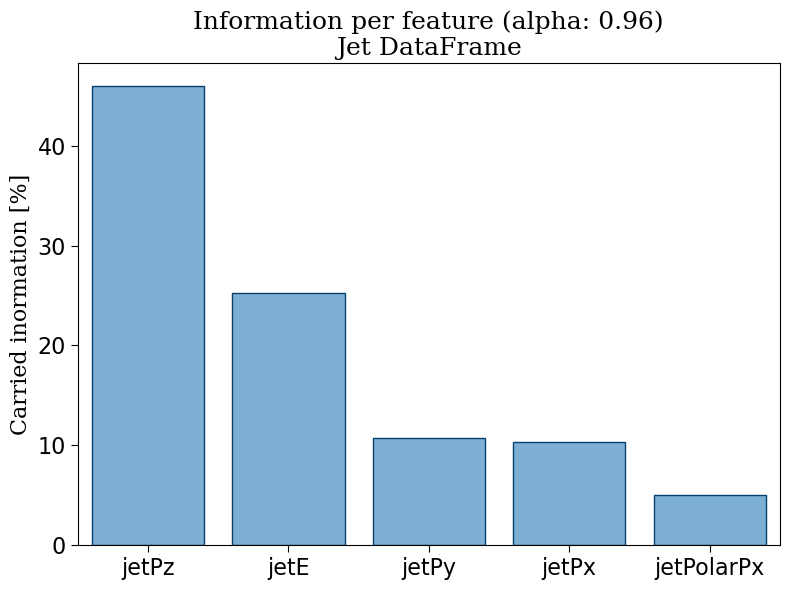

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(8,6), tight_layout = True)

sorted_jetinfo = getInfoXComponent(jet_features, pca).sort_values(0, axis=1, ascending=False)
N_plot = getNexplComponents(sorted_jetinfo.iloc[0])

sns.barplot(sorted_jetinfo.iloc[:,:N_plot], ax=ax, facecolor="#7eb0d5", edgecolor="#06416D")

# Set the x and y labels
ax.set_xlabel("", fontsize=FONTSIZE, fontname="serif")
ax.set_ylabel("Carried inormation [%]", fontsize=FONTSIZE, fontname="serif")
    
# Set the plot title
ax.set_title(f"Information per feature (alpha: {ALPHA})\nJet DataFrame", fontsize=FONTSIZE+2, fontname="serif")
    
# Set the tick parameters
ax.tick_params(axis="both", which="major", labelsize=FONTSIZE, length=5)

if SAVE_FIG:
    fig.savefig('../plots/eda/pca_jet.pdf')

plt.show()

## Particle RAW PCA

In [151]:
particle_df_path = '../data/particle_df.csv'
particle_df = pd.read_csv(particle_df_path)
particle_features = particle_df[particle_df.columns[2:]]

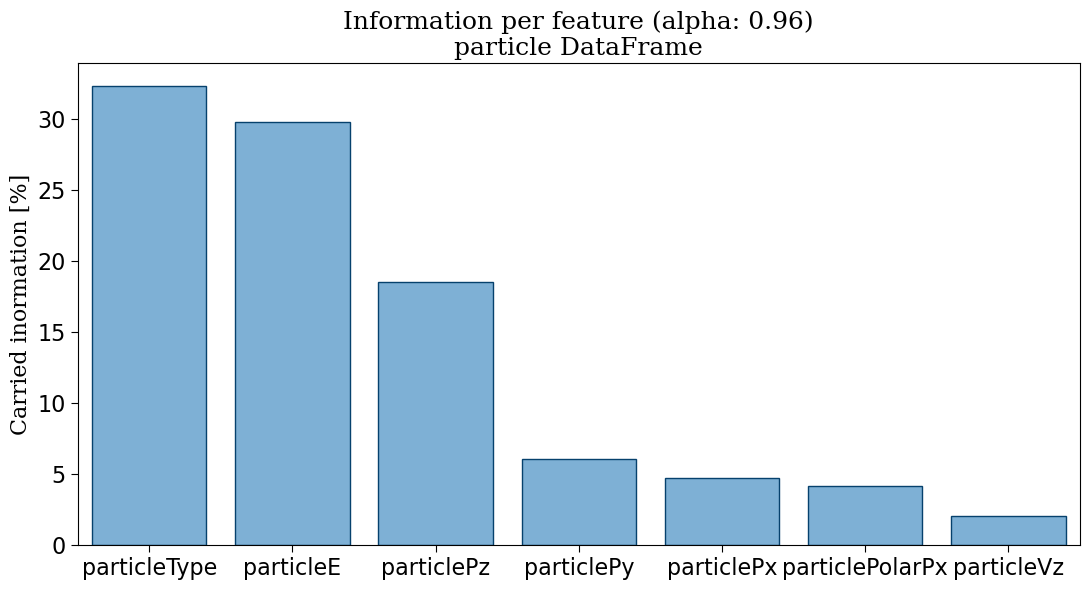

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(11,6), tight_layout = True)

sorted_particleinfo = getInfoXComponent(particle_features, pca).sort_values(0, axis=1, ascending=False)
N_plot = getNexplComponents(sorted_particleinfo.iloc[0])

sns.barplot(sorted_particleinfo.iloc[:,:N_plot], ax=ax, facecolor="#7eb0d5", edgecolor="#06416D")

# Set the x and y labels
ax.set_xlabel("", fontsize=FONTSIZE, fontname="serif")
ax.set_ylabel("Carried inormation [%]", fontsize=FONTSIZE, fontname="serif")
    
# Set the plot title
ax.set_title(f"Information per feature (alpha: {ALPHA})\nparticle DataFrame", fontsize=FONTSIZE+2, fontname="serif")
    
# Set the tick parameters
ax.tick_params(axis="both", which="major", labelsize=FONTSIZE, length=5)

if SAVE_FIG:
    fig.savefig('../plots/eda/pca_particle.pdf')

plt.show()

## Particle preprocessed PCA

In [153]:
particle_prepro_df_path = '../data/particle_df_preprocessed.csv'
particle_prepro_df = pd.read_csv(particle_prepro_df_path)
particle_prepro_features = particle_prepro_df[particle_prepro_df.columns[2:]]

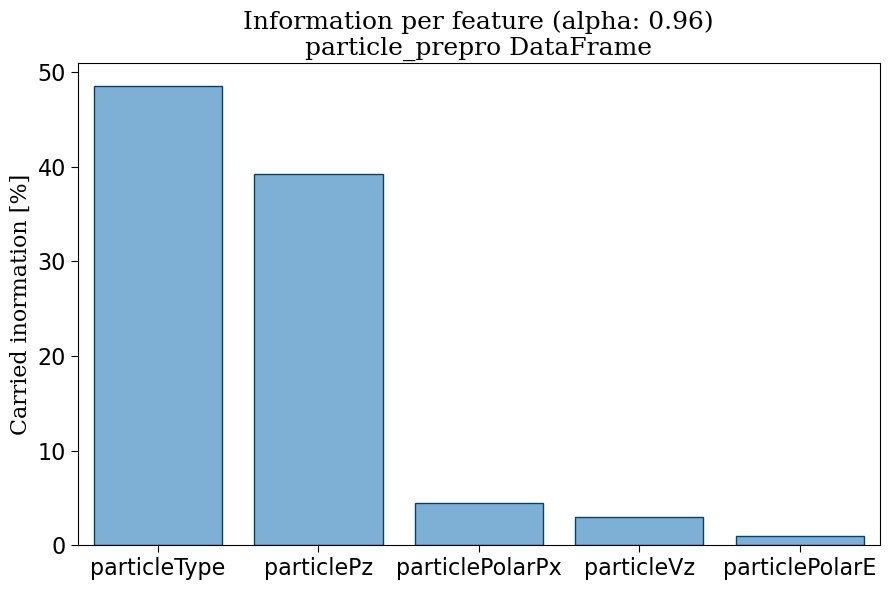

In [165]:
fig, ax = plt.subplots(1, 1, figsize=(9,6), tight_layout = True)

sorted_particle_preproinfo = getInfoXComponent(particle_prepro_features, pca).sort_values(0, axis=1, ascending=False)
N_plot = getNexplComponents(sorted_particle_preproinfo.iloc[0])

sns.barplot(sorted_particle_preproinfo.iloc[:,:N_plot], ax=ax, facecolor="#7eb0d5", edgecolor="#06416D")

# Set the x and y labels
ax.set_xlabel("", fontsize=FONTSIZE, fontname="serif")
ax.set_ylabel("Carried inormation [%]", fontsize=FONTSIZE, fontname="serif")
    
# Set the plot title
ax.set_title(f"Information per feature (alpha: {ALPHA})\nparticle_prepro DataFrame", fontsize=FONTSIZE+2, fontname="serif")
    
# Set the tick parameters
ax.tick_params(axis="both", which="major", labelsize=FONTSIZE, length=5)

if SAVE_FIG:
    fig.savefig('../plots/eda/pca_particle_prepro.pdf')

plt.show()